In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as stl
import datetime as dt
import seaborn as sns
import numpy as np

In [3]:
#Importing Data
flu = pd.read_csv("https://query.data.world/s/36nbd4wq3xmkqijc5a47ujr34h47og")
flu.head(5)

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
0,2009-2010,200940,10/10/09,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/09,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/09,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/09,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/09,California,Influenza_A,1077,3324,32.40


In [4]:
flu.describe()
flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36179 entries, 0 to 36178
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             36179 non-null  object 
 1   date_code          36179 non-null  int64  
 2   weekending         36179 non-null  object 
 3   region             36179 non-null  object 
 4   Respiratory_Virus  36179 non-null  object 
 5   Number_Positive    36179 non-null  int64  
 6   Specimens_Tested   36179 non-null  int64  
 7   Percent_Positive   30345 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.2+ MB


In [5]:
#print unique value of every column of the dataset
for col in flu:
    print(flu[col].unique())

['2009-2010' '2010-2011' '2011-2012' '2012-2013' '2013-2014' '2014-2015'
 '2015-2016' '2016-2017' '2017-2018']
[200940 200941 200942 200943 200944 200945 200946 200947 200948 200949
 200950 200951 200952 201001 201002 201003 201004 201005 201006 201007
 201008 201009 201010 201011 201012 201013 201014 201015 201016 201017
 201018 201019 201020 201021 201022 201023 201024 201025 201026 201027
 201028 201029 201030 201031 201032 201033 201034 201035 201036 201037
 201038 201039 201040 201041 201042 201043 201044 201045 201046 201047
 201048 201049 201050 201051 201052 201101 201102 201103 201104 201105
 201106 201107 201108 201109 201110 201111 201112 201113 201114 201115
 201116 201117 201118 201119 201120 201121 201122 201123 201124 201125
 201126 201127 201128 201129 201130 201131 201132 201133 201134 201135
 201136 201137 201138 201139 201140 201141 201142 201143 201144 201145
 201146 201147 201148 201149 201150 201151 201152 201201 201202 201203
 201204 201205 201206 201207 201208 2

In [6]:
#converting weekending column into date
flu["weekending"]=pd.to_datetime(flu["weekending"]).dt.date
flu.sort_values(by="weekending").head(5)

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
0,2009-2010,200940,2009-10-10,Bay Area,Influenza_A,36,220,16.36
31,2009-2010,200940,2009-10-10,Upper/Lower Southern,RSV,0,11,0.00
30,2009-2010,200940,2009-10-10,Upper/Lower Southern,Total_Influenza,175,499,35.07
29,2009-2010,200940,2009-10-10,Upper/Lower Southern,Influenza_B,1,499,0.20
28,2009-2010,200940,2009-10-10,Upper/Lower Southern,Influenza_A,174,499,34.87


In [7]:
table = pd.pivot_table(flu, values="Number_Positive", index=["weekending"], columns=["Respiratory_Virus"])
table

Respiratory_Virus,Adenovirus,Coronavirus_229E,Coronavirus_HKU1,Coronavirus_NL63,Coronavirus_OC43,Coronavirus_UnknownType,Enterovirus_Rhinovirus,HMPV,Influenza_A,Influenza_B,Parainfluenza_1,Parainfluenza_2,Parainfluenza_3,Parainfluenza_4,Parainfluenza_UnknownType,RSV,Total_Coronavirus,Total_Influenza,Total_Parainfluenza
weekending,,,,,,,,,,,,,,,,,,,
2009-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.250000,0.750000,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,270.000000,NaN
2009-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.250000,1.250000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,365.500000,NaN
2009-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.500000,0.750000,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,350.250000,NaN
2009-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.250000,0.250000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,246.500000,NaN
2009-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.750000,0.750000,NaN,NaN,NaN,NaN,NaN,1.250000,NaN,203.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-01,2.571429,0.0,0.000000,0.0,0.0,0.571429,32.571429,0.285714,0.857143,0.000000,0.000000,1.428571,3.142857,0.571429,0.0,0.285714,0.571429,0.857143,5.142857
2018-09-08,1.714286,0.0,0.285714,0.0,0.0,0.285714,37.714286,0.000000,0.571429,0.571429,0.000000,1.142857,1.714286,1.142857,0.0,0.285714,0.571429,1.142857,4.000000
2018-09-15,2.857143,0.0,0.000000,0.0,0.0,0.571429,46.285714,0.000000,1.714286,0.285714,0.285714,1.428571,4.285714,1.428571,0.0,0.571429,0.571429,2.000000,7.428571


In [8]:
#Conditions to filter only total value
inf_istotal = flu["Respiratory_Virus"] == "Total_Influenza"
cov_istotal = flu["Respiratory_Virus"] == "Total_Coronavirus"

In [9]:
#Subset of flu for total_influenza
tot_infflu = flu[inf_istotal]
tot_infflu.head(5)

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
2,2009-2010,200940,2009-10-10,Bay Area,Total_Influenza,36,220,16.36
6,2009-2010,200940,2009-10-10,California,Total_Influenza,1080,3324,32.49
10,2009-2010,200940,2009-10-10,Central,Total_Influenza,203,787,25.79
14,2009-2010,200940,2009-10-10,Lower Southern,Total_Influenza,21,150,14.00
18,2009-2010,200940,2009-10-10,Northern,Total_Influenza,0,0,NaN


In [10]:
table1 = pd.pivot_table(tot_infflu, values="Number_Positive", index=["weekending","region"], fill_value=0)
table1

Number_Positive
weekending region                               
2009-10-10 Bay Area                           36
           California                       1080
           Central                           203
           Lower Southern                     21
           Northern                            0
...                                          ...
2018-09-29 Central                             0
           Lower Southern                      1
           Northern                            2
           Upper Southern                      4
           Upper/Lower Southern                0

[3296 rows x 1 columns]

In [11]:
#Total sum by the date
inf_groupby=tot_infflu.groupby(["weekending"])["Number_Positive","Specimens_Tested"].sum()
df_inf = pd.DataFrame(inf_groupby)
df_inf["Positive_Rate"] = df_inf["Number_Positive"]/df_inf["Specimens_Tested"]
df_inf.head(5)

C:\Users\kaypa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Number_Positive,Specimens_Tested,Positive_Rate
weekending,,,
2009-10-10,2160,6648,0.324910
2009-10-17,2924,7386,0.395884
2009-10-24,2802,7284,0.384679
2009-10-31,1972,6026,0.327249
2009-11-07,1628,5542,0.293757


In [13]:
#Reset the index to DatetimeIndex for convinience
format ='%Y-%m-%d'
df_inf.index = pd.to_datetime(df_inf.index, format=format)
df_inf = df_inf.set_index(pd.DatetimeIndex(df_inf.index))

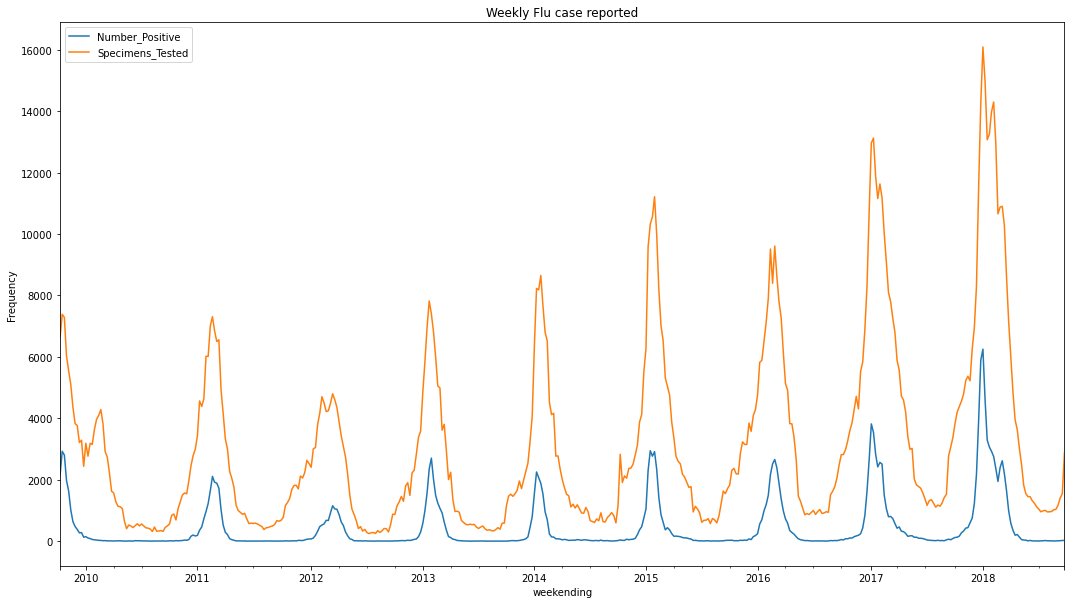

In [14]:
# Frequency of the Test and Postivie Cases
df_inf['Number_Positive'].plot(figsize=(18,10),
                               title="Weekly Flu case reported",
                               xlabel="Date",
                               ylabel="Frequency")
df_inf["Specimens_Tested"].plot()

plt.legend()

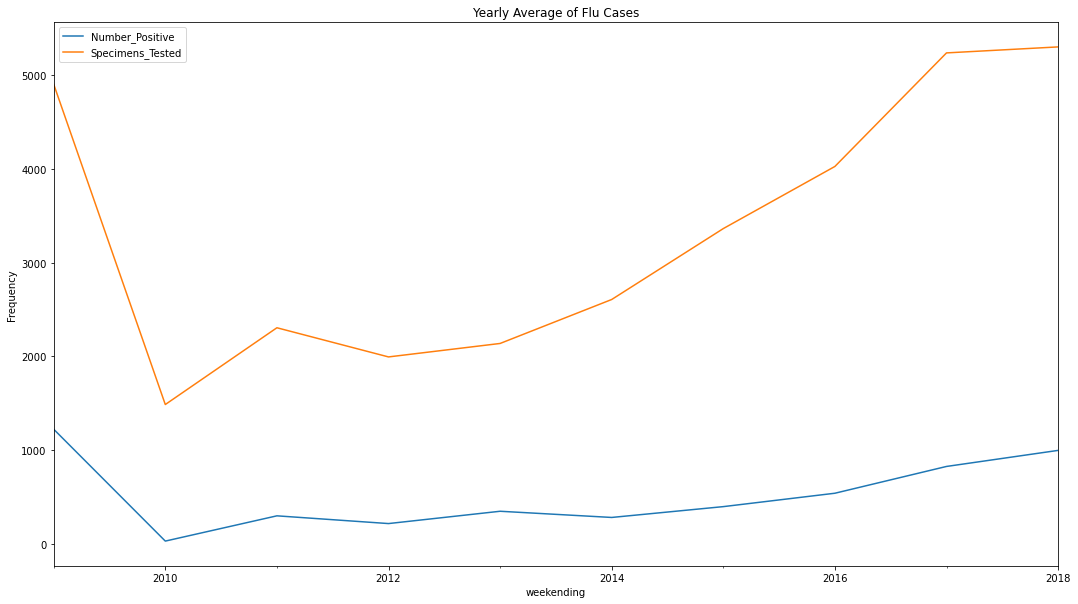

In [16]:
#Yearly Average plot
df_yearly = df_inf.resample("1Y").mean()

df_yearly["Number_Positive"].plot(figsize=(18,10),
                                 title="Yearly Average of Flu Cases",
                                 ylabel="Frequency")
df_yearly["Specimens_Tested"].plot()

plt.legend()

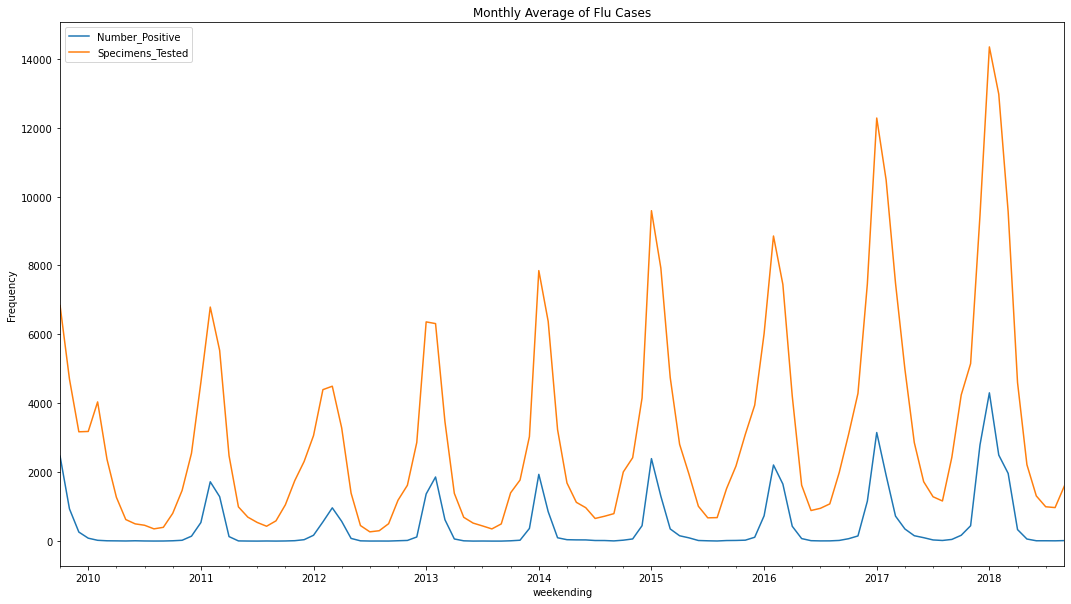

In [17]:
#Monthly Average plot
df_monthly = df_inf.resample("M").mean()

df_monthly["Number_Positive"].plot(figsize=(18,10),
                                 title="Monthly Average of Flu Cases",
                                 ylabel="Frequency")
df_monthly["Specimens_Tested"].plot()

plt.legend()

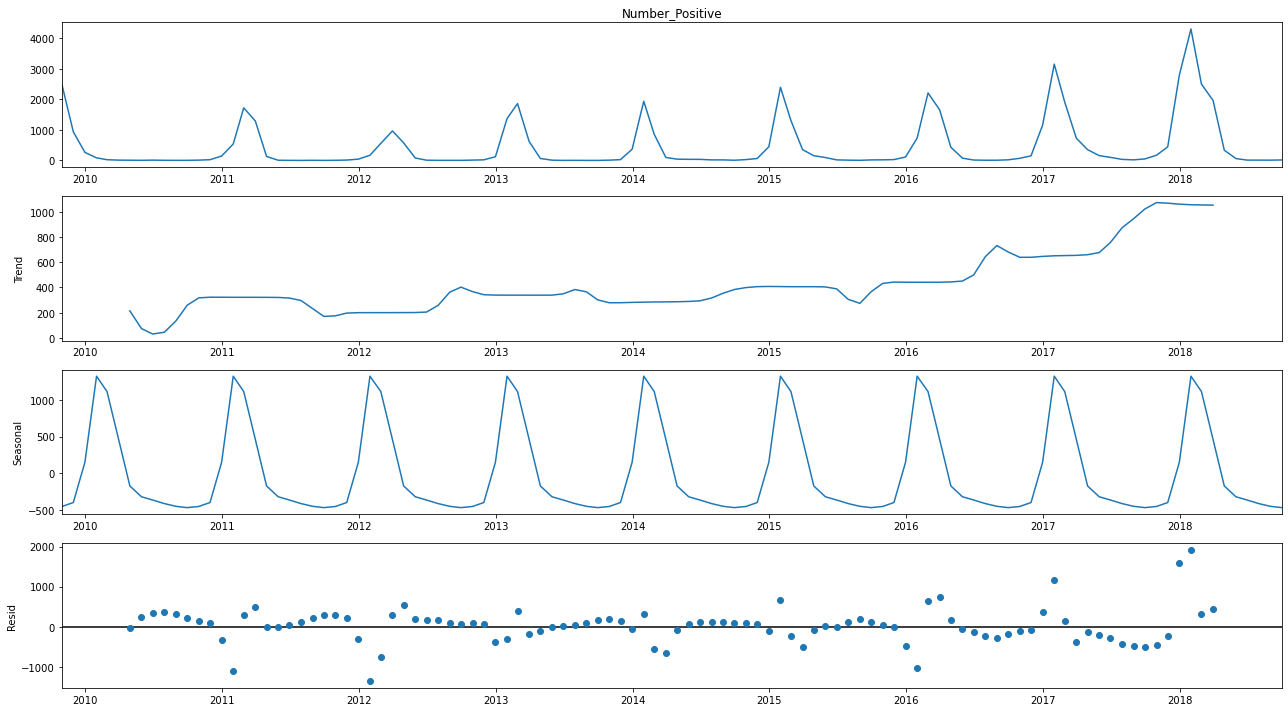

In [18]:
#Decomposing the Positive cases
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

df_monthly_pos = df_monthly["Number_Positive"]

decomp = seasonal_decompose(df_monthly_pos,model='additive')
decomp.plot();

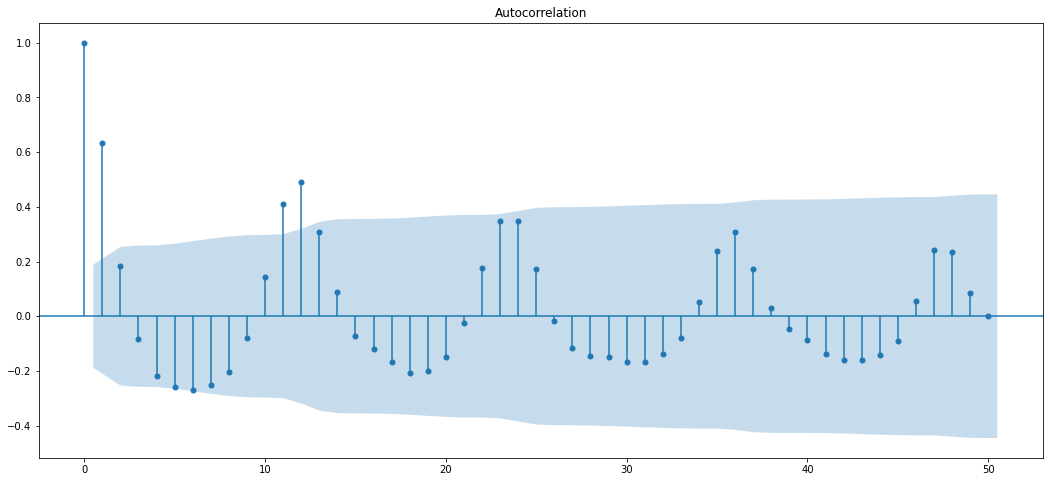

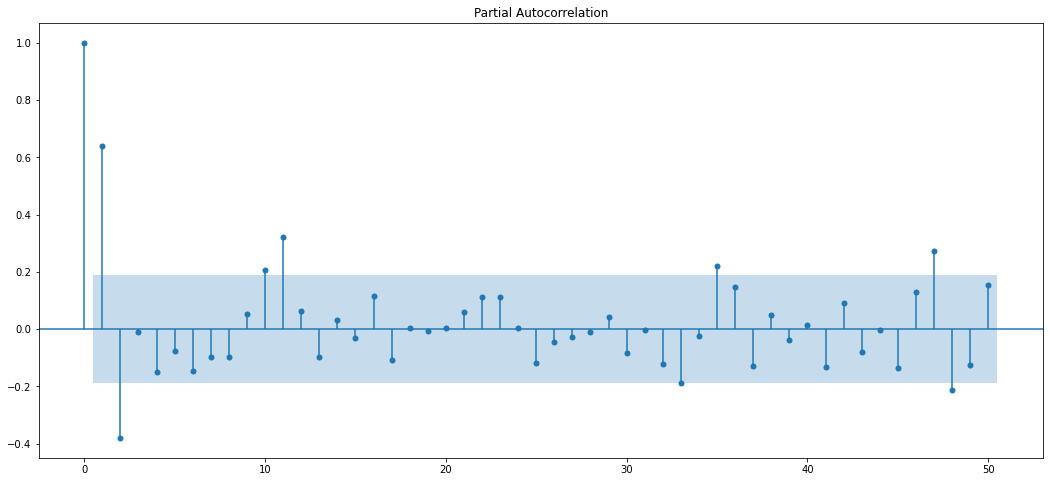

In [19]:
# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax1 = plt.subplots(figsize=(18,8))
fig, ax2 = plt.subplots(figsize=(18,8))

plot_acf(df_monthly_pos, lags=50, ax=ax1);
plot_pacf(df_monthly_pos, lags=50, ax=ax2);

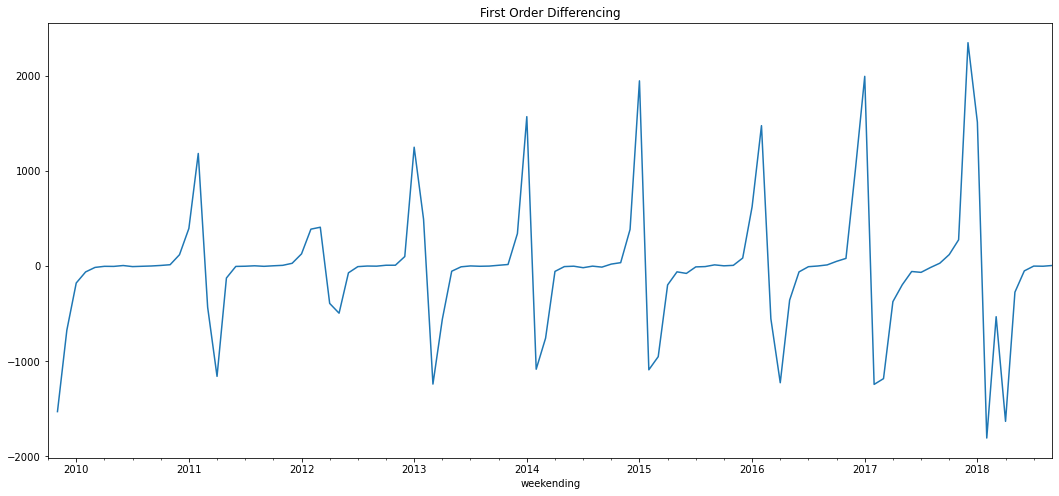

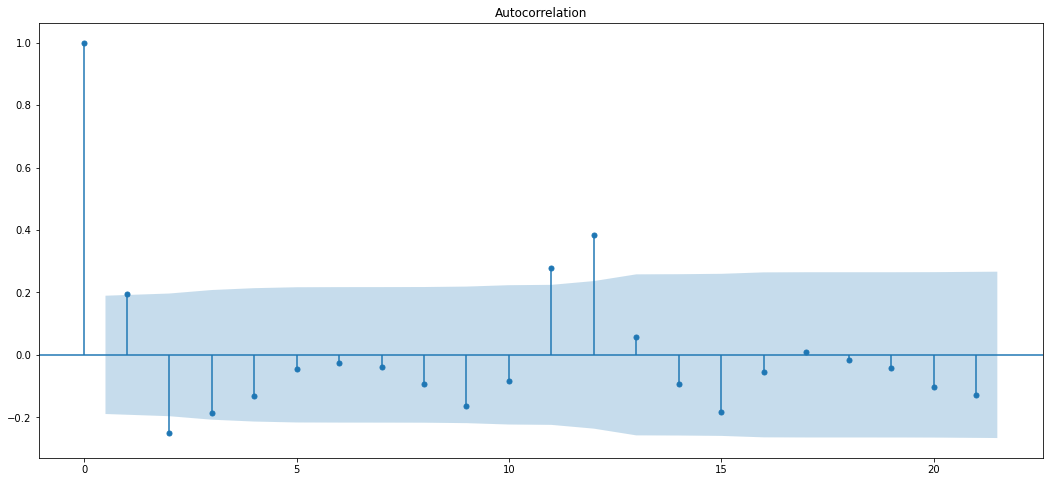

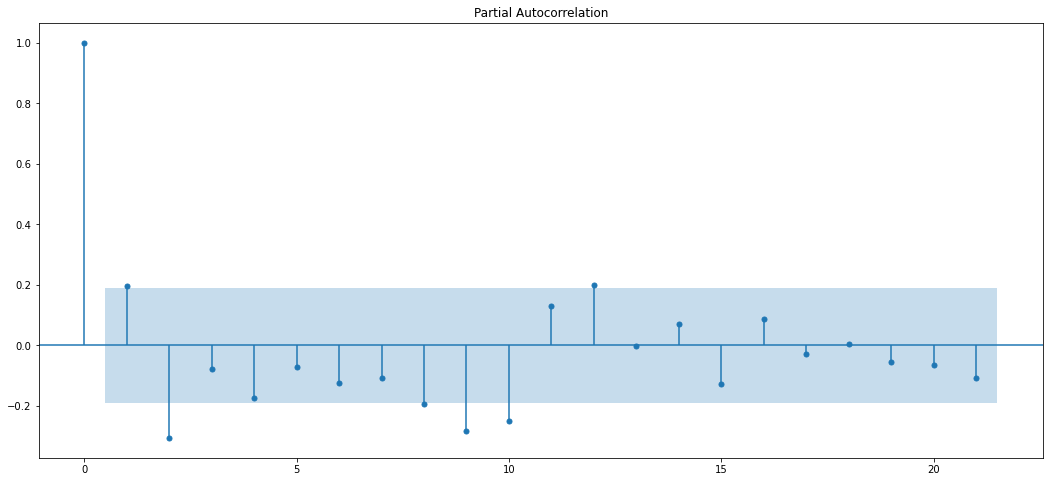

In [20]:
# First Differencing: Stationarity
df_monthly_pos_diff = df_monthly_pos.diff()

fig, ax1 = plt.subplots(figsize=(18,8))
fig, ax2 = plt.subplots(figsize=(18,8))
fig, ax3 = plt.subplots(figsize=(18,8))

df_monthly_pos_diff.plot(ax=ax1, title="First Order Differencing");
plot_acf(df_monthly_pos_diff.dropna(), ax=ax2);
plot_pacf(df_monthly_pos_diff.dropna(), ax=ax3);

In [21]:
# Augmented Dickey-Fuller Test: Stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_result(y):
    #Dickey-Fuller test
    #If the Time Series is differenced prior,
    #drop the first cell of the series 
    results = adfuller(y)
    
    #Parse the test and print the result
    print('ADF Statistics: %f'%results[0])
    print('p-value: %f'%results[1])
    print('Lags Used: %f'%results[2])
    print('Observations Used: %f'%results[3])
    print('Critical Values:')
    for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value))

In [22]:
# Augmented Dickey-Fuller Test
adfuller_result(df_monthly_pos_diff.dropna())

ADF Statistics: -8.640605
p-value: 0.000000
Lags Used: 10.000000
Observations Used: 96.000000
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [23]:
# Converting into the dataframe
df_monthly_pos = df_monthly_pos.rename_axis('weekending').to_frame('Number_Positive')
df_monthly_pos.head(5)

,Number_Positive
weekending,
2009-10-31,2464.5
2009-11-30,935.5
2009-12-31,262.0
2010-01-31,84.4
2010-02-28,23.0


In [24]:
# Split test and train
from sklearn.model_selection import train_test_split
train_inf, test_inf = train_test_split(df_monthly_pos, test_size=0.2, shuffle=False)

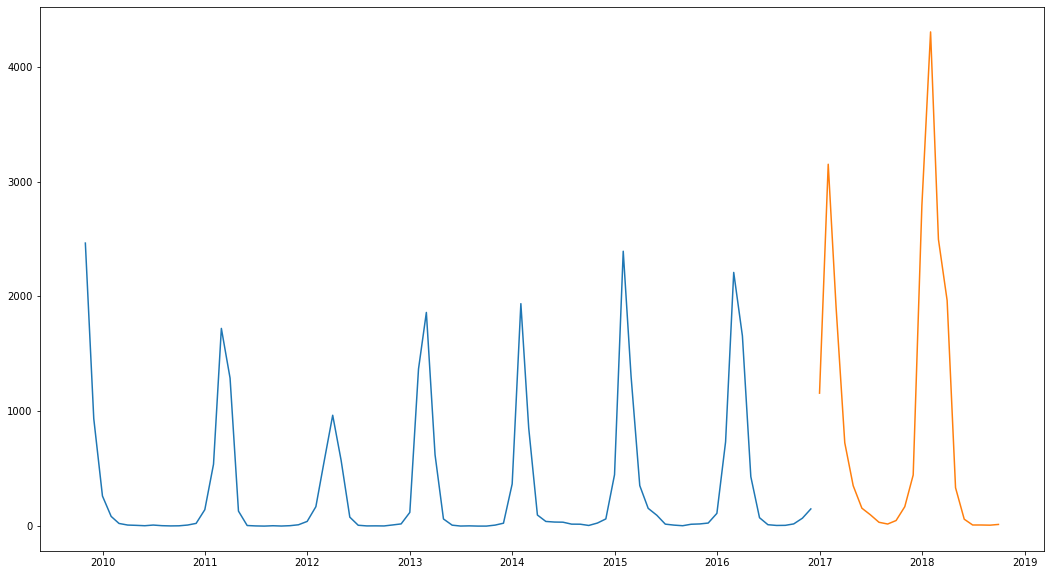

In [25]:
# Visual representation of the split
plt.plot(train_inf)
plt.plot(test_inf)

In [26]:
#Best-fit of the model
import pmdarima as pm
model = pm.auto_arima(df_monthly_pos, d=1, D=1,
                      seasonal=True, m=12,
                      start_P=0, max_P=5,
                      start_Q=0, max_Q=5,
                      start_p=0, max_p=5,
                      start_q=0, max_q=5,
                      trace=True, 
                      error_action='ignore',
                      supress_warning=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1505.463, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1491.423, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1486.332, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1500.568, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1487.820, Time=0.26 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1487.386, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.496, Time=0.12 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1484.624, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1486.155, Time=0.22 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1485.764, Time=0.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1489.820, Time=0.08 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1486.523, Time=0.18 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=1486.442, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 5.632 seconds


In [27]:
# Fit on train model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_inf, 
                order=(0,1,0), 
                seasonal_order=(0,1,1,12),
               enforce_stationarity = False,
               enforce_invertibility = False)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      Number_Positive   No. Observations:                   86
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -459.308
Date:                              Sun, 21 Mar 2021   AIC                            922.617
Time:                                      20:15:33   BIC                            926.805
Sample:                                  10-31-2009   HQIC                           924.255
                                       - 11-30-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.6563      0.068     -9.695      0.000      -0.789      -0.524
sigma2      2.528e+05   3.11e+04      8.133      0.000    1.92e+05    3.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                43.30
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.17
Prob(H) (two-sided):                  0.49   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

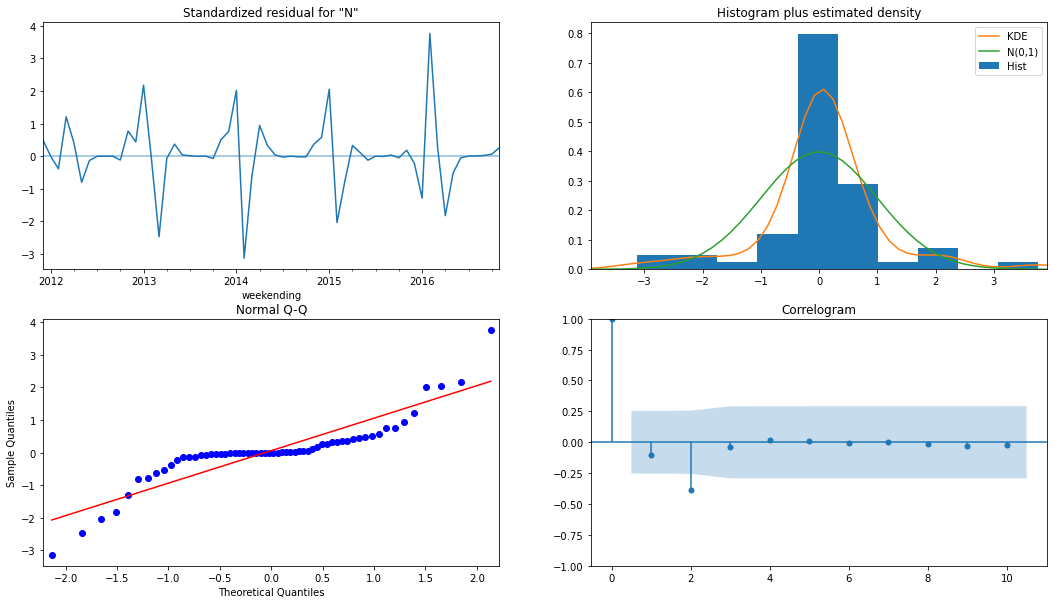

In [28]:
# Plotting the dignostics of the train set
result.plot_diagnostics(figsize=(18,10))
plt.show()

<Figure size 1296x720 with 0 Axes>

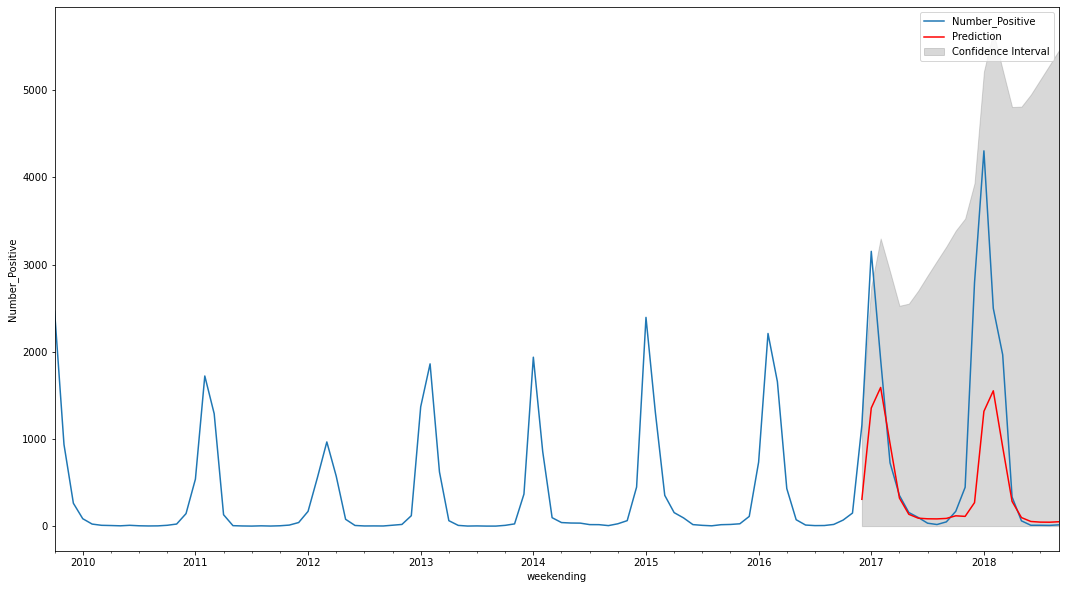

In [48]:
# Fitting test-set with the model
inf_future = result.get_prediction(start=test_inf.index[0], end=test_inf.index[21], dynamic=False)
inf_future_int = inf_future.conf_int()

#Plotting observed values and predictions
plt.figure(figsize=(18,10))

ax = df_monthly_pos.plot(label = "Number_Positive")
inf_future.predicted_mean.plot(ax=ax, label="Prediction", color = 'Red')
ax.fill_between(inf_future_int.index,
                inf_future_int.iloc[:, 1],
                color='grey', alpha=0.3, label = "Confidence Interval")

plt.ylabel("Number_Positive")
plt.legend()

<AxesSubplot:title={'center':'Weekly Flu case reported'}, xlabel='Date', ylabel='Rate'>

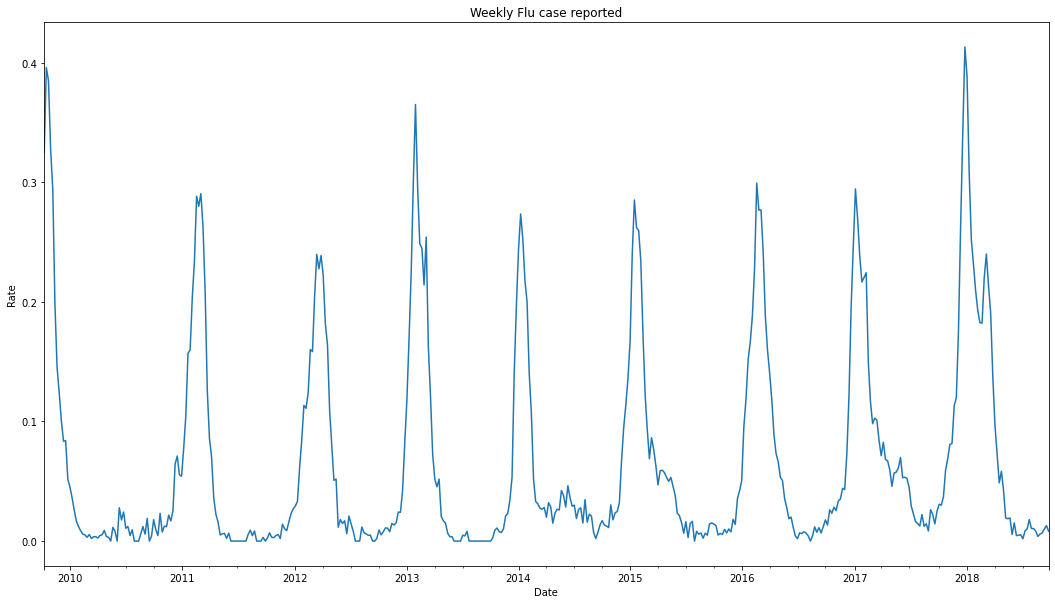

In [15]:
# Positive Rate of the flu cases
df_inf['Positive_Rate'].plot(figsize=(18,10),
                               title="Weekly Flu case reported",
                               xlabel="Date",
                               ylabel="Rate")

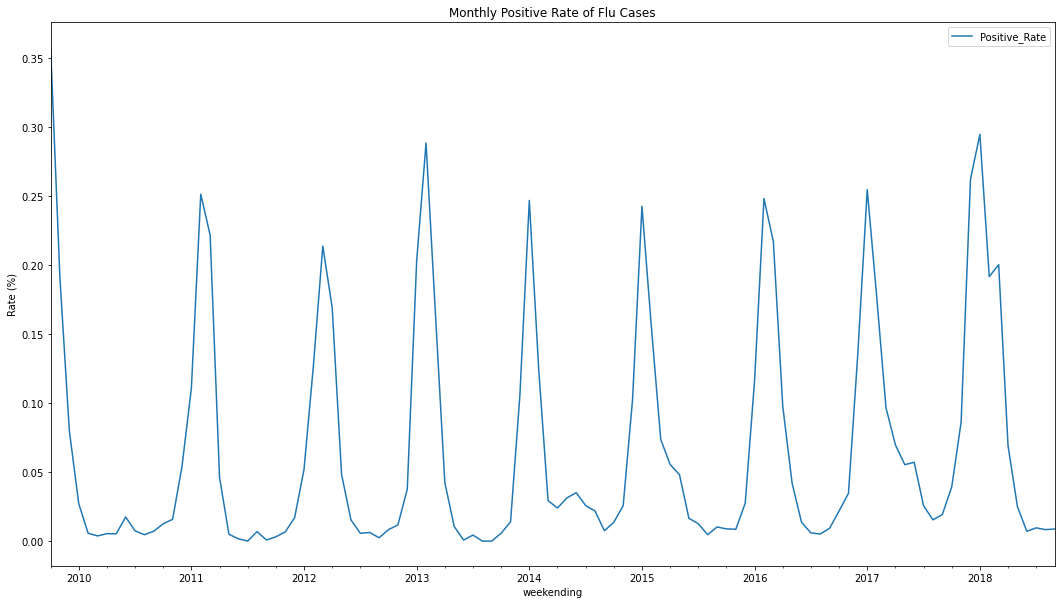

In [50]:
# Positive rate of monthly resampled
df_monthly["Positive_Rate"].plot(figsize=(18,10),
                                 title="Monthly Positive Rate of Flu Cases",
                                 ylabel="Rate (%)")
plt.legend()

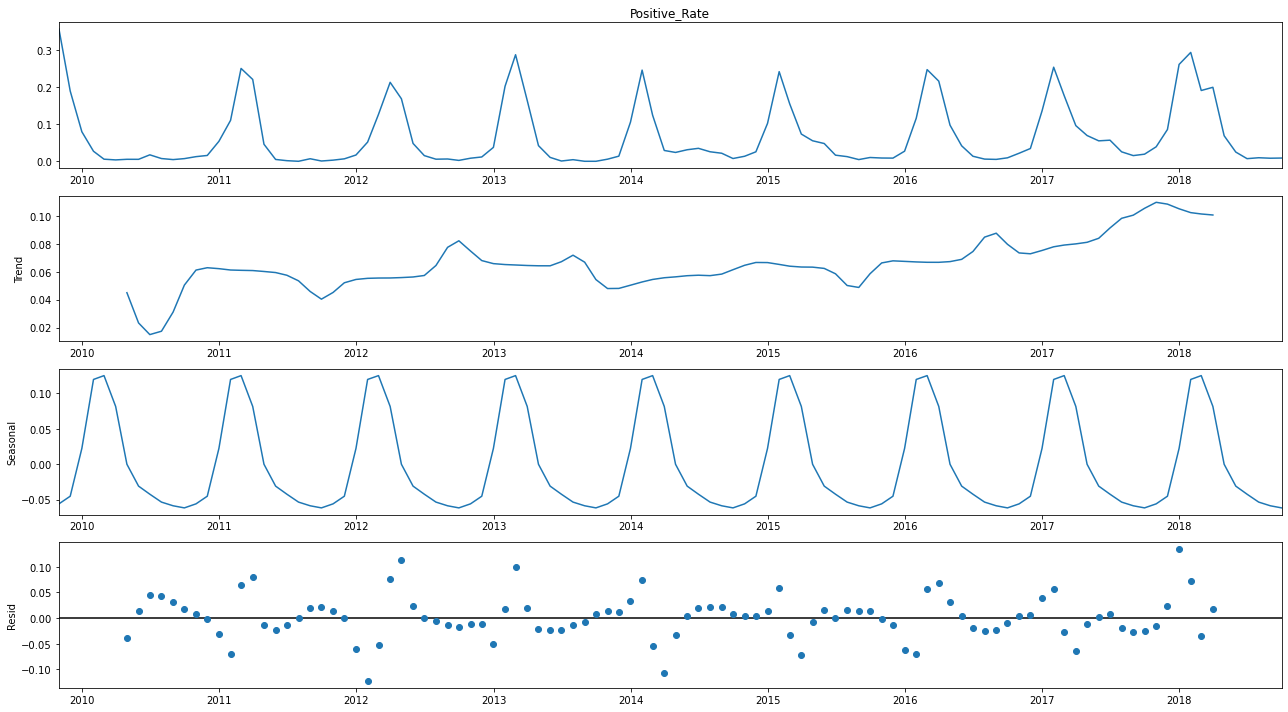

In [51]:
# Decomposing Positive Rate
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

df_monthly_pos2 = df_monthly["Positive_Rate"]

decomp = seasonal_decompose(df_monthly_pos2,model='additive')
decomp.plot();

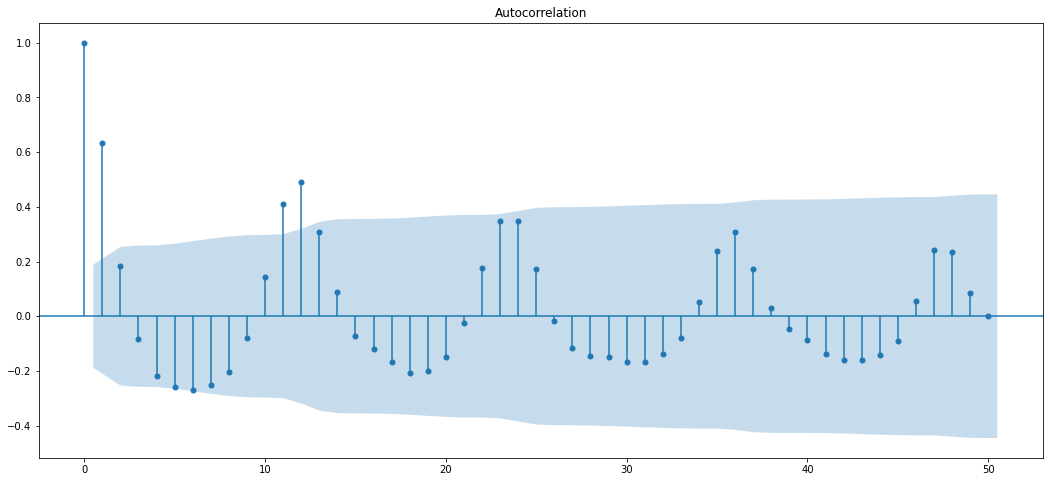

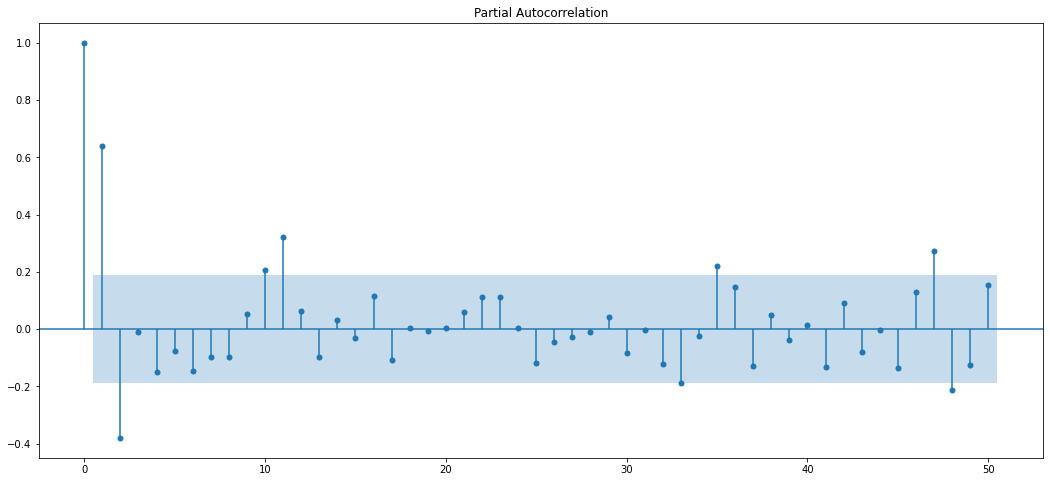

In [52]:
# ACF and PACF - Positive Rate
fig, ax1 = plt.subplots(figsize=(18,8))
fig, ax2 = plt.subplots(figsize=(18,8))

plot_acf(df_monthly_pos, lags=50, ax=ax1);
plot_pacf(df_monthly_pos, lags=50, ax=ax2);

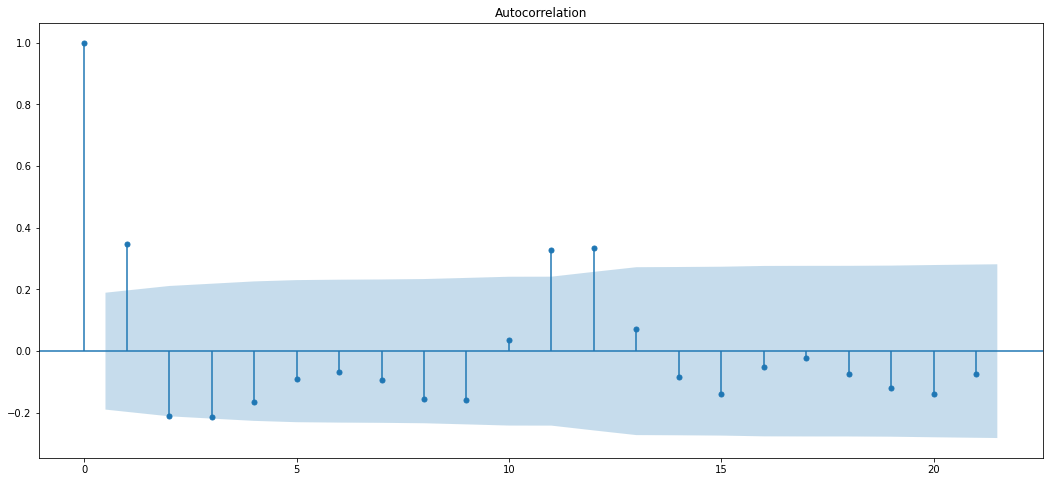

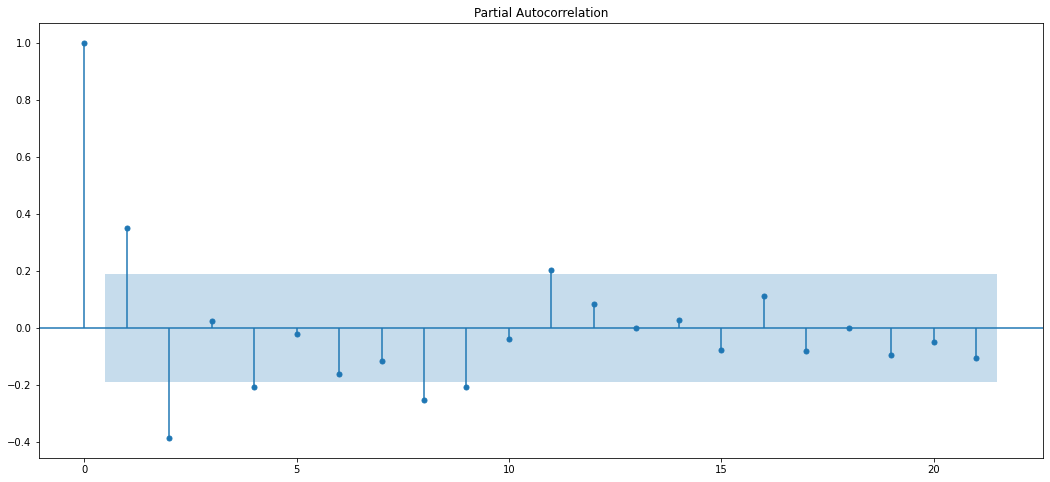

In [55]:
# Difference the positive rate to optain stationaritiy
df_monthly_pos_diff2 = df_monthly_pos2.diff()

fig, ax1 = plt.subplots(figsize=(18,8))
fig, ax2 = plt.subplots(figsize=(18,8))

plot_acf(df_monthly_pos_diff2.dropna(), ax=ax1);
plot_pacf(df_monthly_pos_diff2.dropna(), ax=ax2);

In [56]:
# Augmented Dickey-Fuller Test
adfuller_result(df_monthly_pos_diff2.dropna())

ADF Statistics: -6.415811
p-value: 0.000000
Lags Used: 13.000000
Observations Used: 93.000000
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


In [58]:
# Converting into the dataframe
df_monthly_pos2 = df_monthly_pos2.rename_axis('weekending').to_frame('Positive_Rate')
df_monthly_pos2.head(5)

train_inf2, test_inf2 = train_test_split(df_monthly_pos2, test_size=0.2, shuffle=False)

In [59]:
# Best-fit of the model
model = pm.auto_arima(df_monthly_pos2, d=1, D=1,
                      seasonal=True, m=12,
                      start_P=0, max_P=5,
                      start_Q=0, max_Q=5,
                      start_p=0, max_p=5,
                      start_q=0, max_q=5,
                      trace=True, 
                      error_action='ignore',
                      supress_warning=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-229.949, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-247.816, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-267.108, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-243.172, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-265.109, Time=0.54 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-265.109, Time=0.65 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-258.570, Time=0.18 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-263.129, Time=0.91 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-253.339, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-269.571, Time=0.32 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-249.399, Time=0.13 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-267.571, Time=0.43 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-267.571, Time=1.42 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-261.899, Time=0.27 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-265.590, Time=1.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-256.695, Time=0.25 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-269.858, Time=0.70 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=-250.656, Time=0.25 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=-267.870, Time=0.58 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(2,1,1)(0,1,2)[12]             : AIC=-267.872, Time=1.88 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-263.048, Time=0.40 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(2,1,1)(1,1,2)[12]             : AIC=-265.860, Time=1.47 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=-269.089, Time=0.34 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(3,1,1)(0,1,1)[12]             : AIC=-268.984, Time=0.71 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,1,1)[12]             : AIC=-281.860, Time=0.88 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.37 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(2,1,2)(1,1,1)[12]             : AIC=-280.100, Time=1.01 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,1,2)[12]             : AIC=-279.871, Time=1.76 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(2,1,2)(1,1,0)[12]             : AIC=-277.213, Time=0.74 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=-277.723, Time=0.86 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-282.924, Time=0.47 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.27 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(1,1,1)[12]             : AIC=-280.976, Time=0.63 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(1,1,2)(0,1,2)[12]             : AIC=-280.965, Time=1.97 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(1,1,0)[12]             : AIC=-278.185, Time=0.82 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(1,1,2)(1,1,2)[12]             : AIC=-278.971, Time=2.12 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.65 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,3)(0,1,1)[12]             : AIC=-281.414, Time=0.78 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,3)(0,1,1)[12]             : AIC=-283.091, Time=1.28 sec
 ARIMA(0,1,3)(0,1,0)[12]             : AIC=inf, Time=0.33 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,3)(1,1,1)[12]             : AIC=-280.890, Time=0.89 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,3)(0,1,2)[12]             : AIC=inf, Time=2.55 sec
 ARIMA(0,1,3)(1,1,0)[12]             : AIC=inf, Time=0.57 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,3)(1,1,2)[12]             : AIC=-279.089, Time=1.32 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,4)(0,1,1)[12]             : AIC=-281.701, Time=1.38 sec


C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,4)(0,1,1)[12]             : AIC=-279.588, Time=1.03 sec
 ARIMA(0,1,3)(0,1,1)[12] intercept   : AIC=-281.848, Time=0.83 sec

Best model:  ARIMA(0,1,3)(0,1,1)[12]          
Total fit time: 36.787 seconds


In [60]:
# Fit model
model = SARIMAX(train_inf2, 
                order=(0,1,3), 
                seasonal_order=(0,1,1,12),
               enforce_stationarity = False,
               enforce_invertibility = False)
result2 = model.fit()
result2.summary()

C:\Users\kaypa\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        Positive_Rate   No. Observations:                   86
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                 101.881
Date:                              Mon, 22 Mar 2021   AIC                           -193.762
Time:                                      20:57:22   BIC                           -183.547
Sample:                                  10-31-2009   HQIC                          -189.792
                                       - 11-30-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0983      0.452     -0.217      0.828      -0.985       0.788
ma.L2         -0.8097      0.479     -1.691      0.091      -1.748       0.129
ma.L3         -0.1461      0.228     -0.641      0.522      -0.593       0.301
ma.S.L12      -0.9891      2.896     -0.341      0.733      -6.666       4.688
sigma2         0.0012      0.004      0.329      0.743      -0.006       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                38.63
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -0.15
Prob(H) (two-sided):                  0.15   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

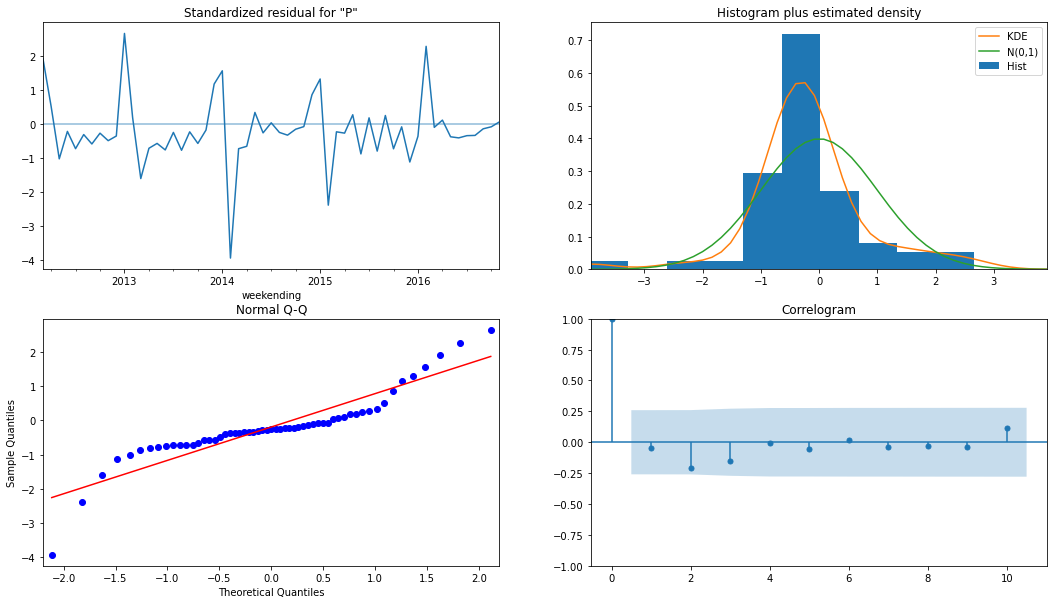

In [61]:
# Plotting the dignostics of the train set
result2.plot_diagnostics(figsize=(18,10))
plt.show()

<Figure size 1296x720 with 0 Axes>

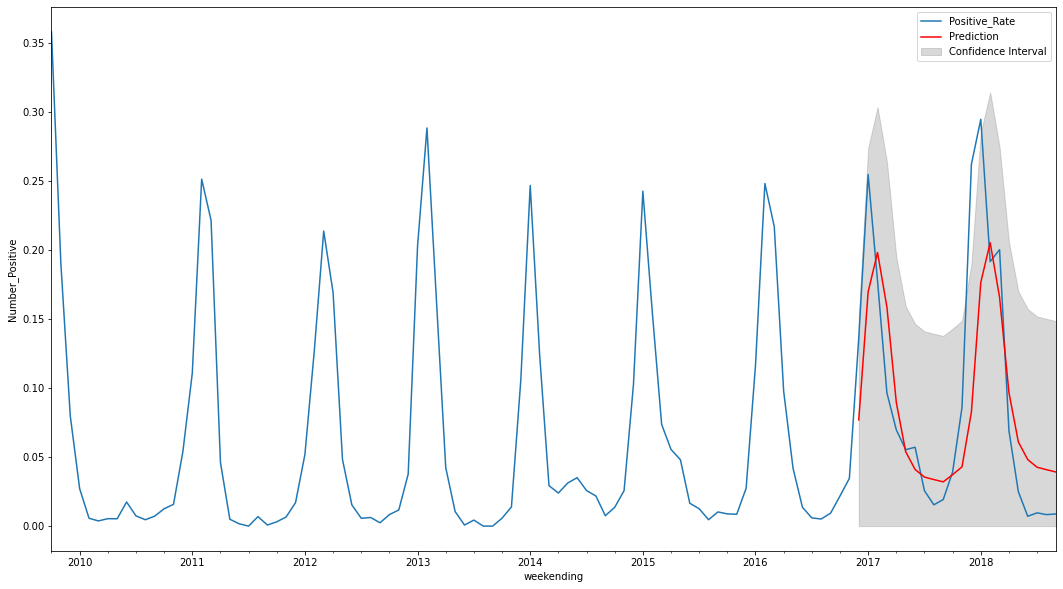

In [62]:
# Fitting test-set with the model
inf_future2 = result2.get_prediction(start=test_inf2.index[0], end=test_inf2.index[21], dynamic=False)
inf_future_int2 = inf_future2.conf_int()

#Plotting observed values and predictions
plt.figure(figsize=(18,10))

ax = df_monthly_pos2.plot(label = "Number_Positive")
inf_future2.predicted_mean.plot(ax=ax, label="Prediction", color = 'Red')
ax.fill_between(inf_future_int2.index,
                inf_future_int2.iloc[:, 1],
                color='grey', alpha=0.3, label = "Confidence Interval")

plt.ylabel("Number_Positive")
plt.legend()

In [40]:
#Subset of flu for total_coronavirus
#tot_covflu = flu[cov_istotal]
#tot_covflu.sort_values(by="weekending").head(5)

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
15441,2015-2016,201540,2015-10-10,Bay Area,Total_Coronavirus,0,0,NaN
15460,2015-2016,201540,2015-10-10,California,Total_Coronavirus,2,519,0.39
15479,2015-2016,201540,2015-10-10,Central,Total_Coronavirus,0,103,0.00
15498,2015-2016,201540,2015-10-10,Lower Southern,Total_Coronavirus,0,0,NaN
15517,2015-2016,201540,2015-10-10,Northern,Total_Coronavirus,0,0,NaN
